<a href="https://colab.research.google.com/github/nicolaerosca/colab_notebooks/blob/master/How_To_Connect_Local_Runtime_with_Tesla_V100_Deep_Learning_Instance_on_GCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title 
from IPython.display import Image, display

# How To Connect Colab Local Runtime with preemtible Tesla V100 Deep Learning Instance on GCP

**1. Go to your GCP console**


https://console.cloud.google.com/compute

**2. Launch Cloud Shell**


Export your image, zone(where you have quotas) and instance(any name you like) like this:

If you want pytorch:

```
export IMAGE_FAMILY="pytorch-latest-cu92"
export ZONE="europe-west4-a "
export INSTANCE_NAME="deeplearning"
```

for tensorflow:

```
export IMAGE_FAMILY="tf-latest-gpu"
export ZONE="europe-west4-a "
export INSTANCE_NAME="deeplearning"

```

Then make compute instance with DeepLearning VM like this:

```
gcloud compute instances create $INSTANCE_NAME \
  --zone=$ZONE \
  --image-family=$IMAGE_FAMILY \
  --image-project=deeplearning-platform-release \
  --maintenance-policy=TERMINATE \
  --accelerator type=nvidia-tesla-v100,count=1 \
  --metadata='install-nvidia-driver=True' \
  --preemptible
```

Wait ~5min. Output should look be like this:


```
Created [https://www.googleapis.com/compute/v1/projects/kagglevaluepredictionchallenge/zones/europe-west4-a/instances/deeplearning].
NAME          ZONE            MACHINE_TYPE   PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
deeplearning  europe-west4-a  n1-standard-1  true         10.164.0.2   35.204.194.200  RUNNING
```

And you will see green running instance.
Go to next step

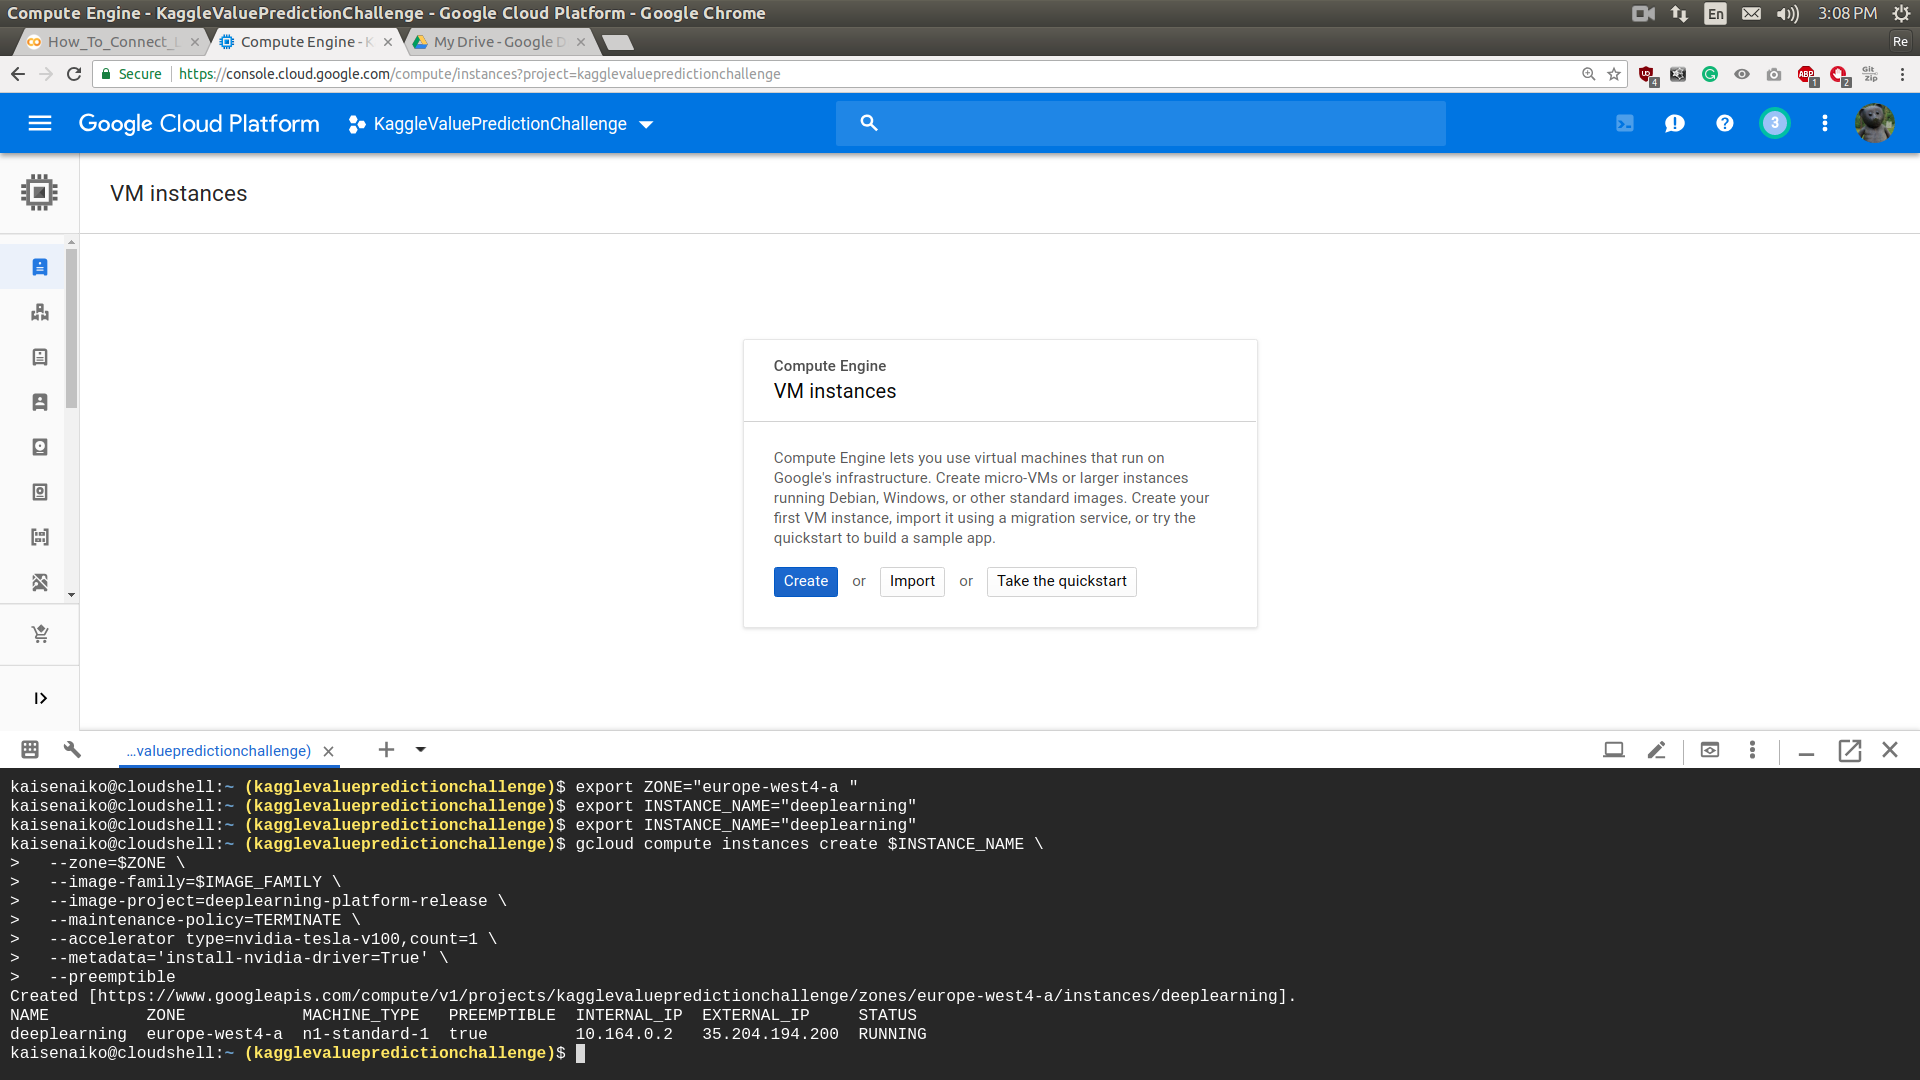

In [0]:
#@title
display(Image('Screenshot from 2018-11-26 15-08-26.png', width=920, height=540 ))

**3.Launch Terminal **

ssh to your compute instance (sometimes you have to wait couple min before it becomes avaivable to ssh)

```
gcloud compute ssh --zone europe-west4-a deeplearning -- -L 8888:localhost:8888
```



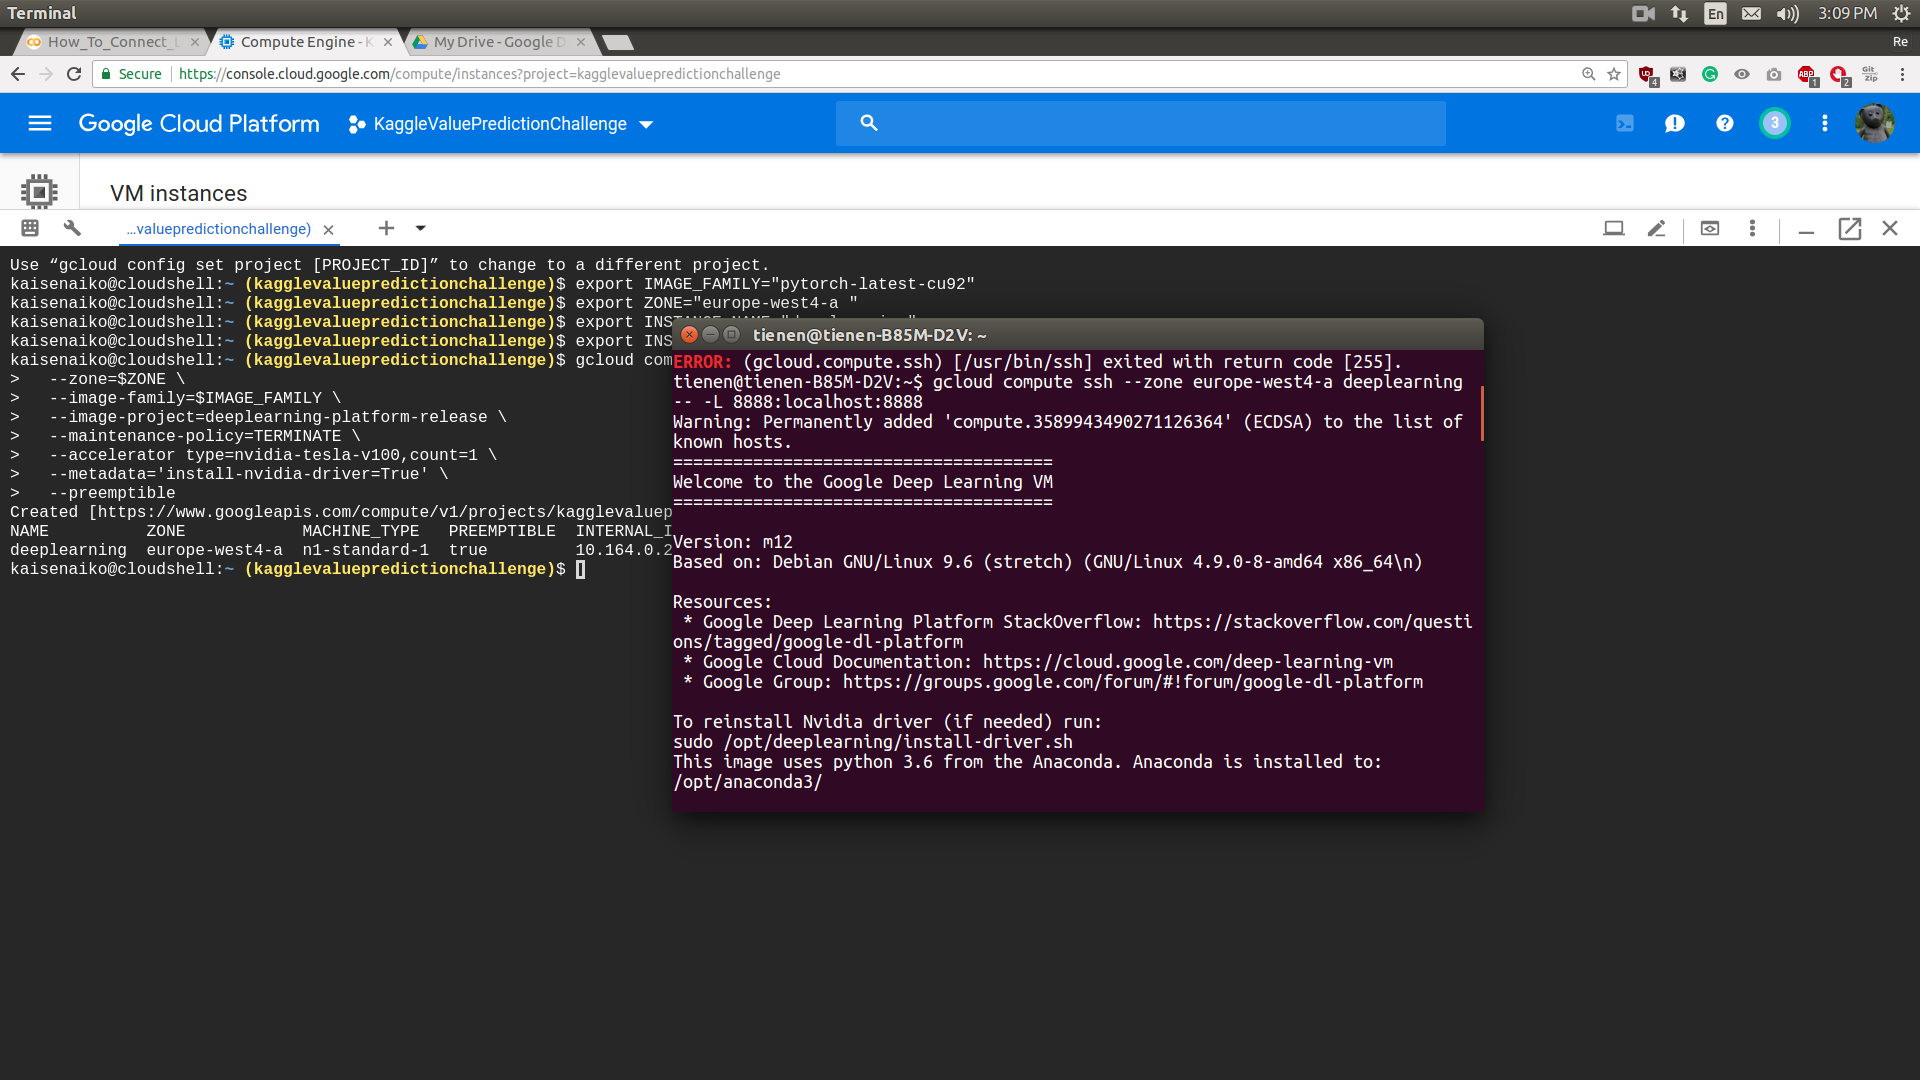

In [0]:
#@title
display(Image('Screenshot from 2018-11-26 15-09-12.png', width=920, height=540 ))

**4.In your instance**

Make sure this is installed:

```
pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws
```




Launch jupyter and go to link:

```
jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0
```



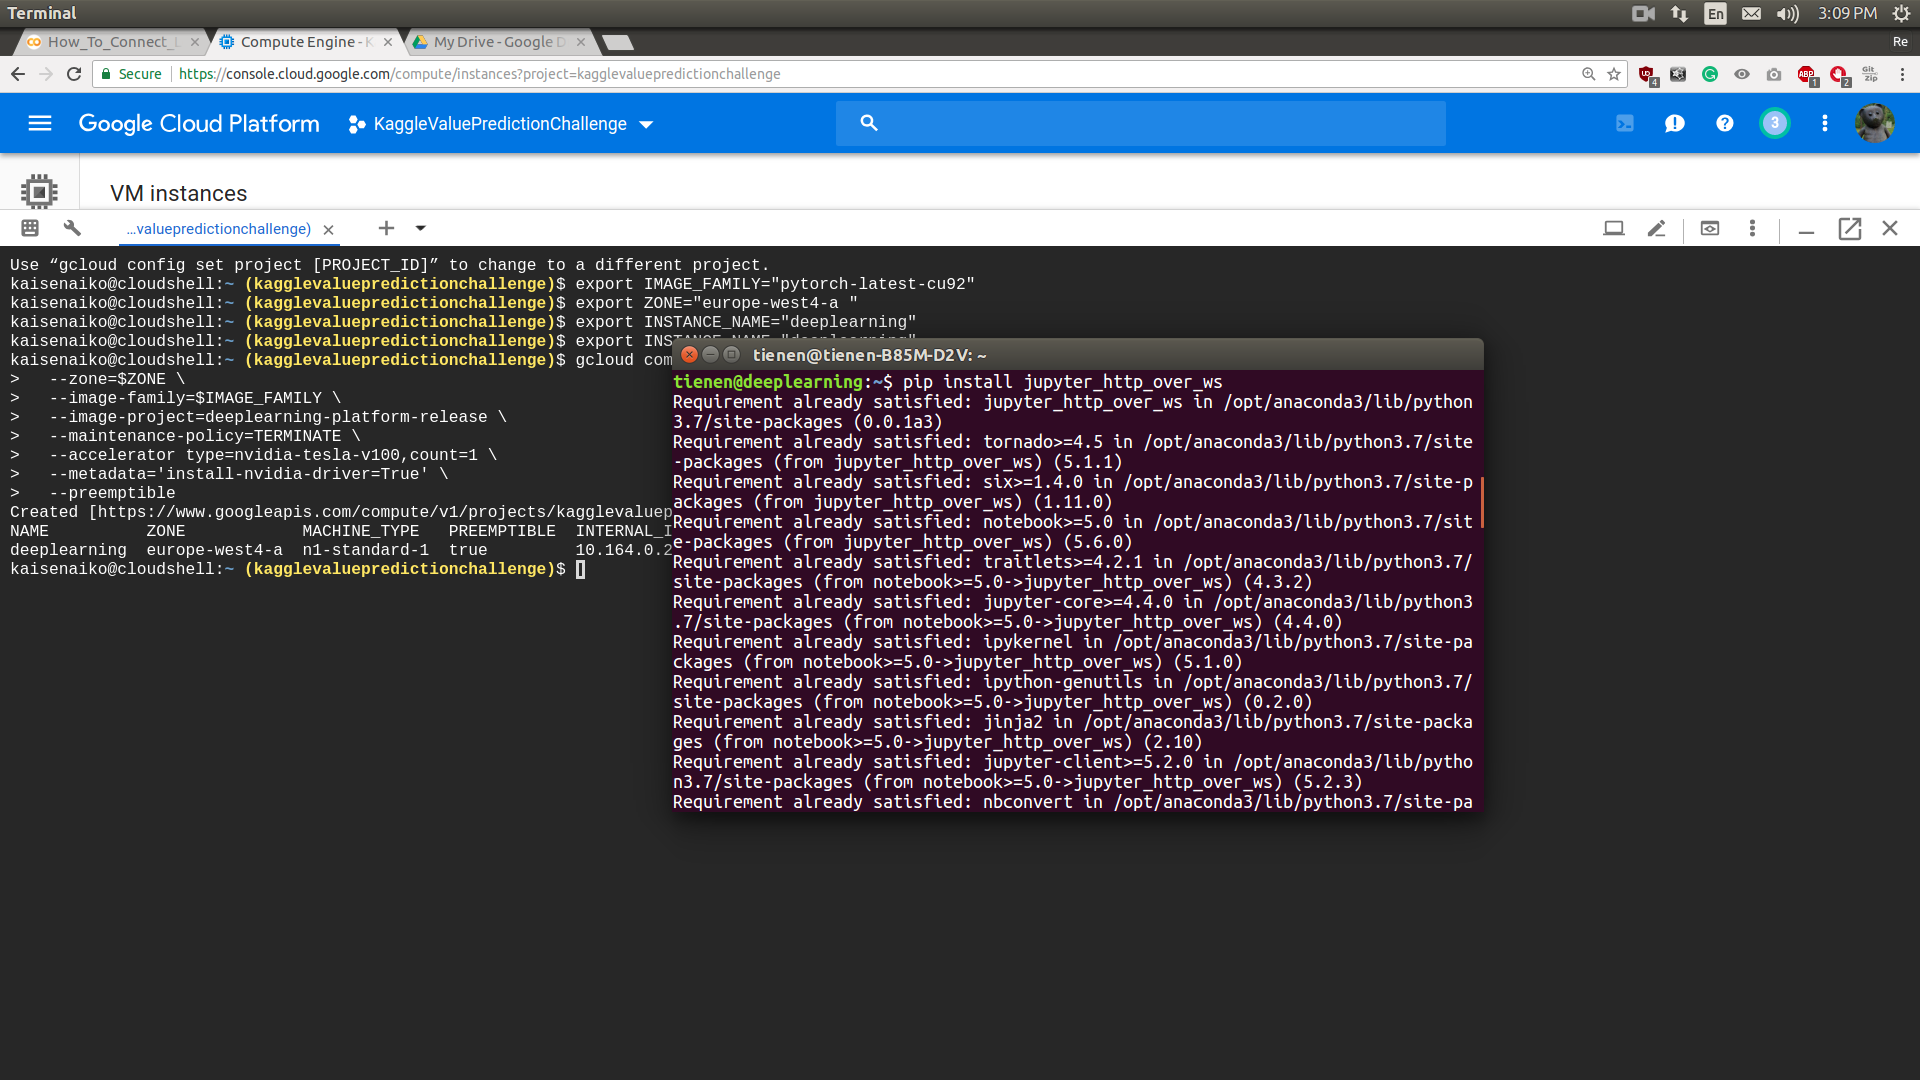

In [0]:
#@title
display(Image('Screenshot from 2018-11-26 15-09-27.png', width=920, height=540 ))



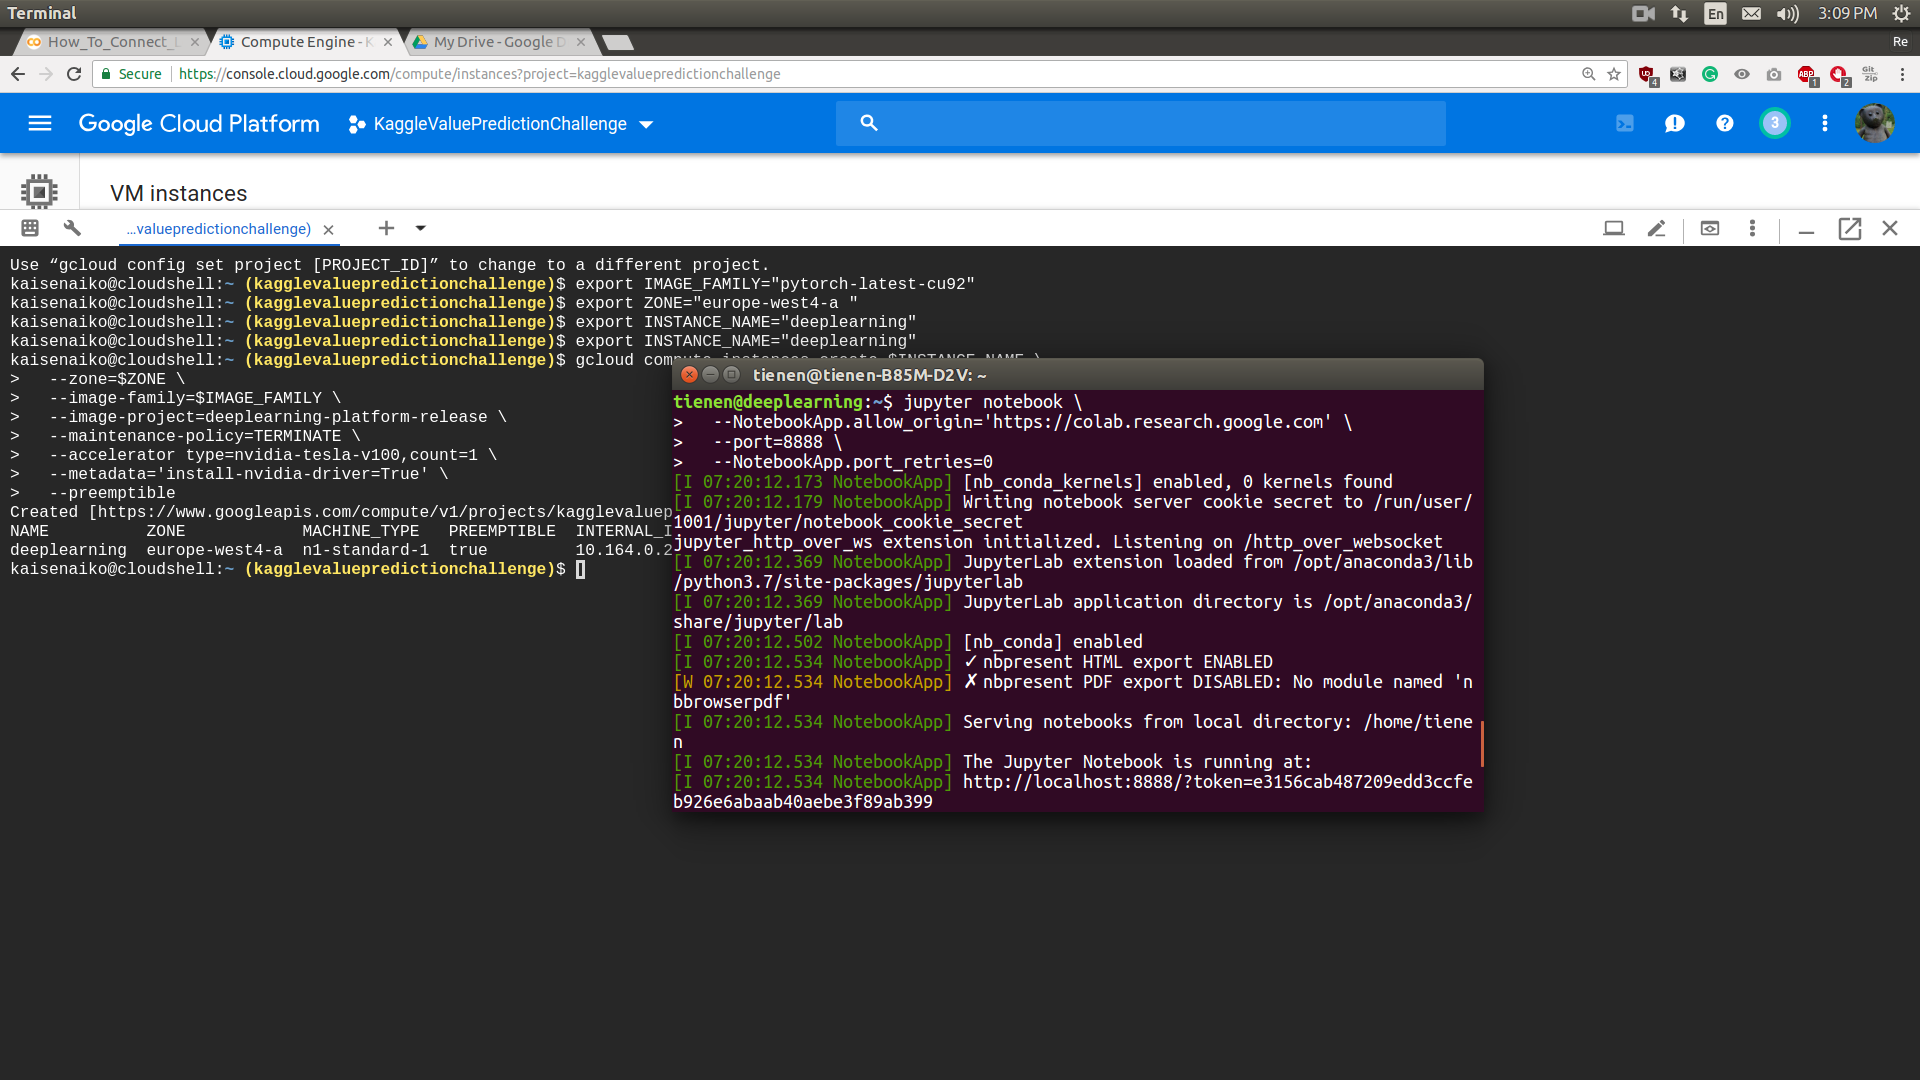

In [0]:
#@title
display(Image('Screenshot from 2018-11-26 15-09-39.png', width=920, height=540 ))

**5.In Colab **

Connect to local runtime
port:
8888



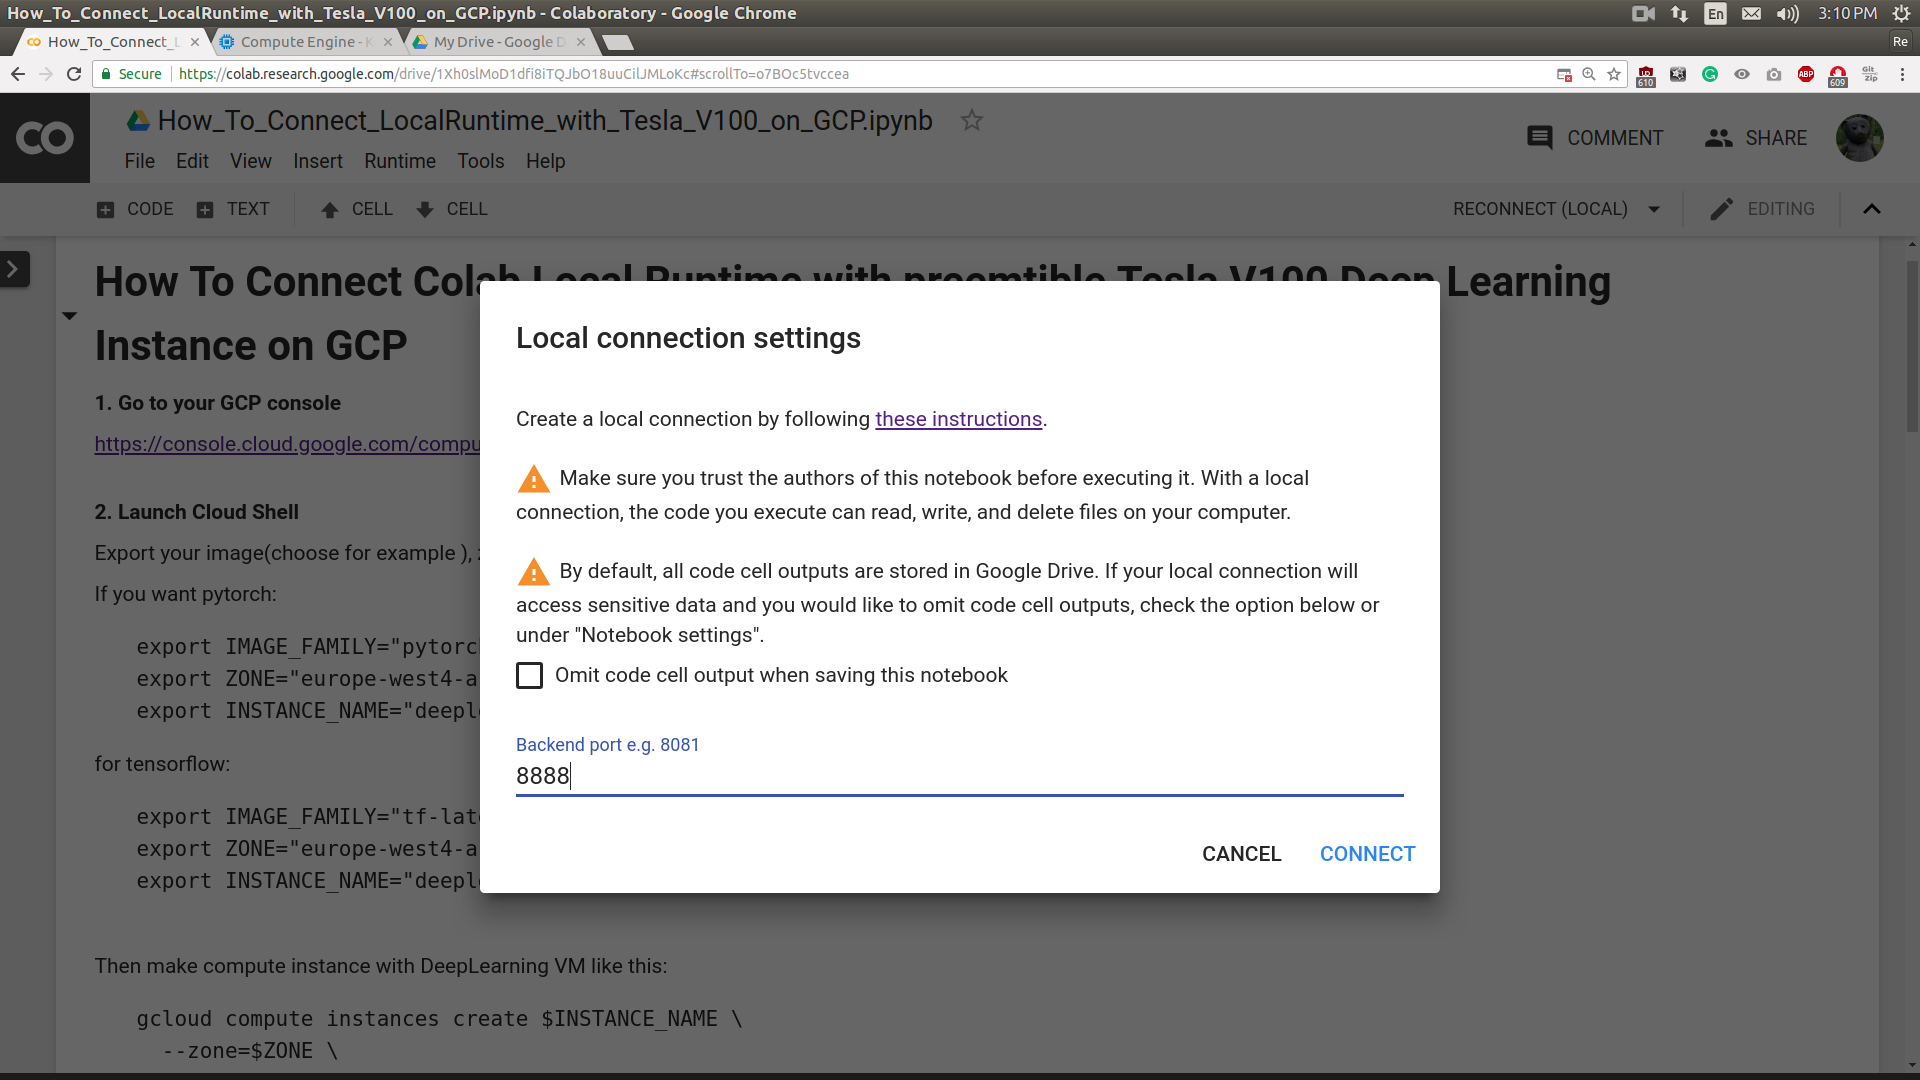

In [0]:
#@title
display(Image('Screenshot from 2018-11-26 15-10-09.png', width=920, height=540 ))

**6.Make sure your gpu is available and ready to go:**

In [0]:

# check your gpu is available:
# for pytorch instance:

import torch

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

    
#initialize your GPU    
torch.cuda.init()



Using device: cuda

Tesla V100-SXM2-16GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


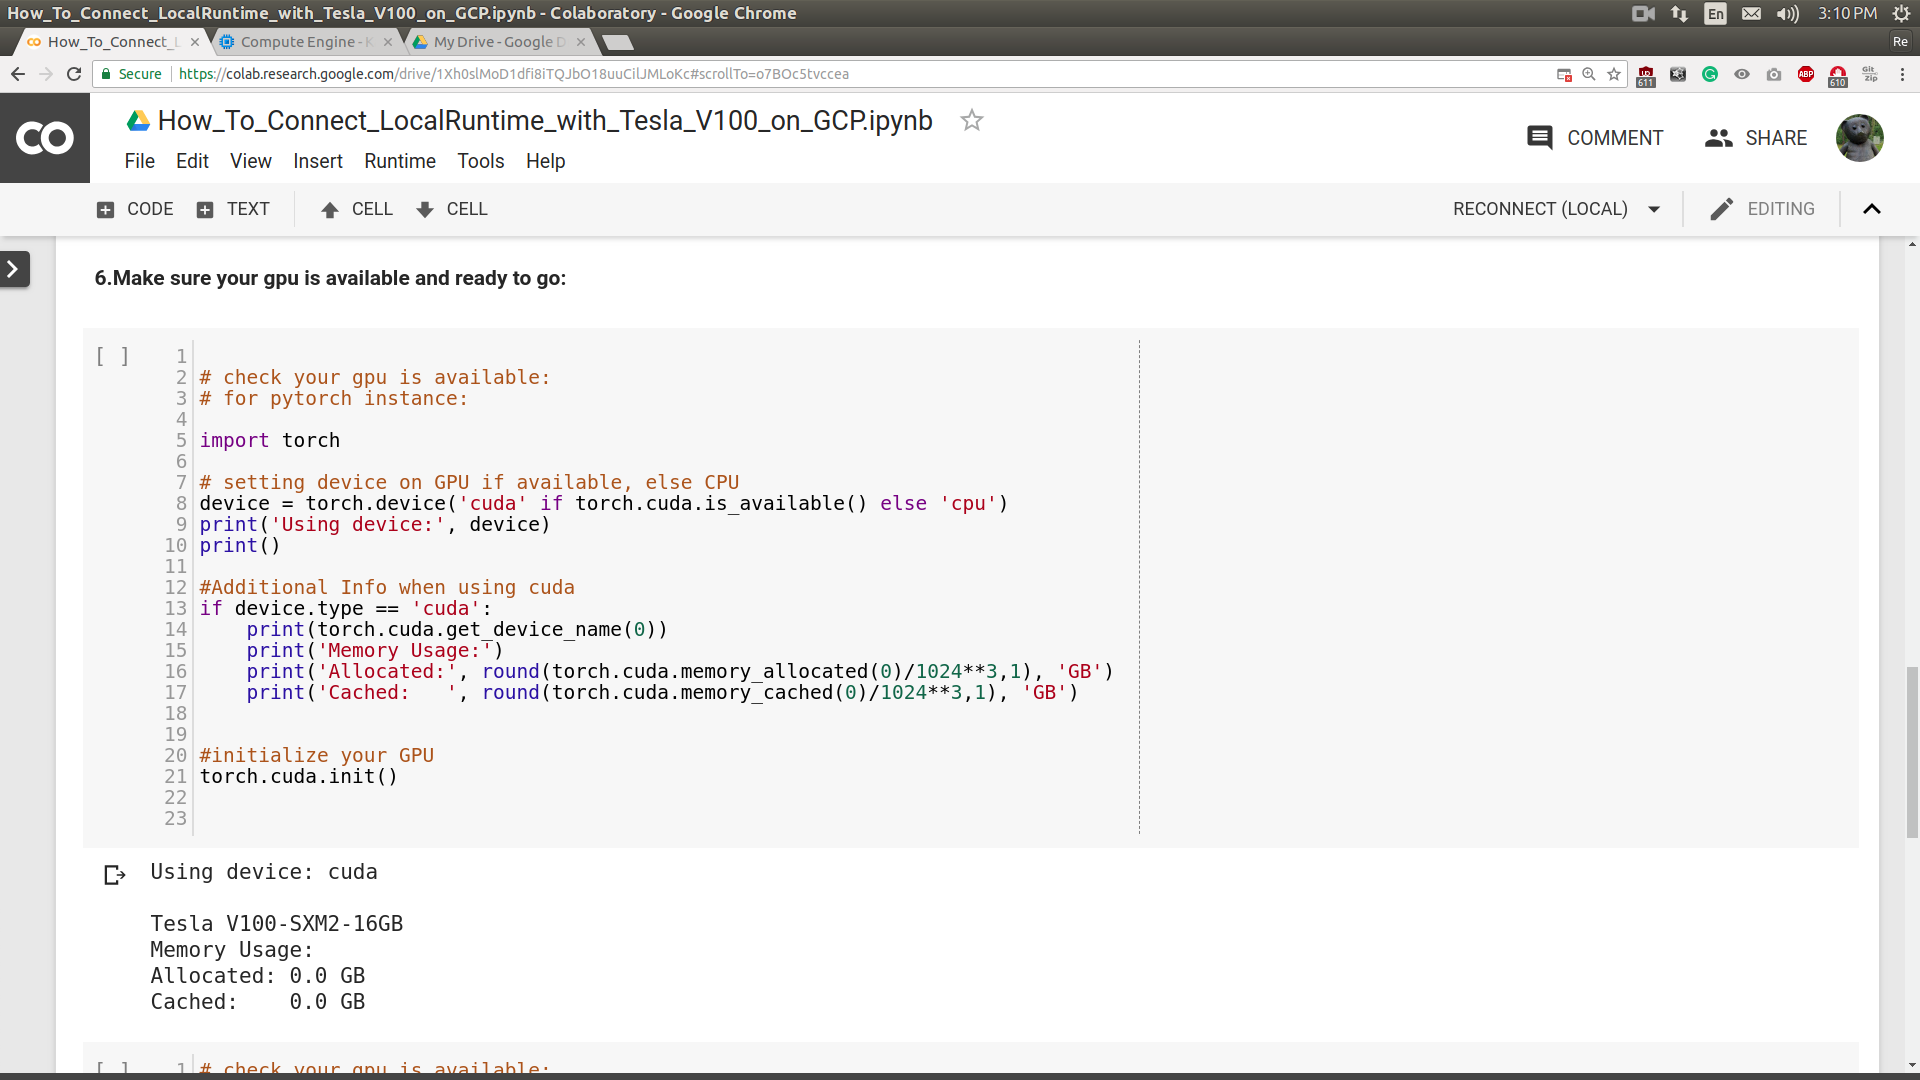

In [0]:
#@title
display(Image('Screenshot from 2018-11-26 15-10-28.png', width=920, height=540 ))

In [0]:
# check your gpu is available:
# for tensorflow instance:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

 *NOTE *
 
** Compute Instance: Make sure to stop it or delete when job is done! Don't leave it! **


 Maybe a better idea is not to use instance for prototyping to avoid extra charge. You can use colab with free hosted GPU instead. Use instance to speed up training process.
 
** Quotas.** 
Request your quotas for preemptible GPU if you haven't yet. Go to manage quotas and request. It takes ~day to get response.


**Errors.**
If you see an error 255 ( 3 step) trying to ssh , just wait a bit, sometimes it takes time  for instance to locate IP adress
 
 **Other ports**
 Use other ports 8889, 8890, etc. , 
 just change them on steps 3 and 4 
 

For additional info check this google drive folder:
[Screenshots and video instuction](https://drive.google.com/open?id=1lRIS3n8bzOFziPff9Ykn6IL1JOV0fftO)

That's all this should work!

If you have any questions or issues contact @Zack on slack
or kaisenaiko@gmail.com. 
Thanks and happy deep learning!

<table class="tfo-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/drive/1Xh0slMoD1dfi8iTQJbO18uuCilJMLoKc">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank"  href="https://github.com/ZackPashkin/-social-networks-with-pytorch_geometric-/blob/master/How_To_Connect_Local_Runtime_with_Tesla_V100_Deep_Learning_Instance_on_GCP.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>